# Leitura do dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

diabetes = pd.read_csv('/home/ld_brito/CinUFPE/SiDi/Projeto1/Datasets/Diabetes/Kaggle/EarlyStageDiabetesRiskPredictionDataset.csv')
diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [2]:
diabetes.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

# Trocando variáveis categóricas por numéricas e escalando a idade por MinMax

In [3]:
diabetes = diabetes.replace(['Yes','No','Male','Female','Positive','Negative'],[1,0,1,0,1,0])
diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


# Feature Selection

## Variáveis contínuas

### Teste-F

In [4]:
from sklearn.feature_selection import f_classif

x = diabetes['Age'].array.reshape(-1, 1)  #Variável dependente
y = diabetes['class']    #Variável alvo

# Ajuste da função
bestfeatures_f = f_classif(x,y)

# Criação do Dataframe
dfscores_f = pd.DataFrame(bestfeatures_f[0])
dfpvalues_f = pd.DataFrame(bestfeatures_f[1])
dfcolumns_f = pd.DataFrame(np.array(['Age']))
featureScores_f = pd.concat([dfcolumns_f,dfscores_f,dfpvalues_f],axis=1)
featureScores_f.columns = ['Atributo','Score','P-value']  #nome das colunas do dataframe

# Print da tabela de Score e P-valor do Teste F
print(featureScores_f)

  Atributo     Score   P-value
0      Age  6.191289  0.013151


### Mutual Information

In [5]:
from sklearn.feature_selection import mutual_info_classif

x = diabetes['Age'].array.reshape(-1, 1)  #Variável dependente
y = diabetes['class']    #Variável alvo

# Devido a natureza estocástica do método de aproximação dessa 
# função de mutual information para dados contínuos em relação aos discretos,
# é preciso realizar muitas repetições para obeter um resultado confiável
mean_mi=0
for i in range(1000):
    bestfeatures_mi = mutual_info_classif(x,y,discrete_features=False)
    mean_mi += bestfeatures_mi/1000

# Criação do Dataframe
dfscores_mi = pd.DataFrame(mean_mi)
dfcolumns_mi = pd.DataFrame(np.array(['Age']))
featureScores_mi = pd.concat([dfcolumns_mi,dfscores_mi],axis=1)
featureScores_mi.columns = ['Atributo','Score']  #nome das colunas do dataframe
# Print da tabela de Score de Mutual Information 
print(featureScores_mi.sort_values('Score',ascending = False).reset_index(drop=True))

  Atributo    Score
0      Age  0.12512


## Variáveis Categóricas

### Mutual information

              Atributo     Score
0             Polyuria  0.251093
1           Polydipsia  0.248879
2               Gender  0.113274
3   sudden weight loss  0.103121
4      partial paresis  0.100266
5           Polyphagia  0.060888
6         Irritability  0.050512
7             Alopecia  0.035464
8      visual blurring  0.032305
9             weakness  0.029574
10    muscle stiffness  0.007606
11      Genital thrush  0.006270
12             Obesity  0.002669
13     delayed healing  0.001105
14             Itching  0.000090


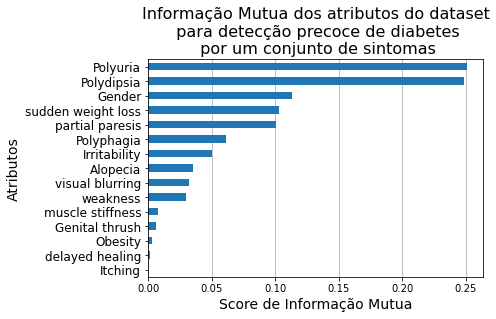

In [6]:
from sklearn.feature_selection import mutual_info_classif

x = diabetes.iloc[:,1:-1]
y = diabetes.iloc[:,-1]

bestfeatures_mi = mutual_info_classif(x,y,discrete_features=True)

# Criação do Dataframe
dfscores_mi = pd.DataFrame(bestfeatures_mi)
dfcolumns_mi = pd.DataFrame(np.array(x.columns))
featureScores_mi = pd.concat([dfcolumns_mi,dfscores_mi],axis=1)
featureScores_mi.columns = ['Atributo','Score']  #nome das colunas do dataframe
# Print da tabela de Score de Mutual Information 
print(featureScores_mi.sort_values('Score',ascending = False).reset_index(drop=True))

# Plot dos atributos em um gráfico de barras
featureScores_mi.sort_values('Score',ascending = True).plot.barh(x = 'Atributo',y = 'Score',rot=0,zorder=2,legend=False)
plt.grid(axis='x')
plt.title("Informação Mutua dos atributos do dataset\n para detecção precoce de diabetes\n por um conjunto de sintomas",fontdict={'size':16})
plt.yticks(fontsize=12)
plt.xlabel("Score de Informação Mutua",fontsize=14)
plt.ylabel("Atributos",fontsize=14)
plt.show()

### Qui-Quadrado

              Atributo       Score       P-valor
2           Polydipsia  120.785515  4.257624e-28
1             Polyuria  116.184593  4.330532e-27
3   sudden weight loss   57.749309  2.977447e-14
11     partial paresis   55.314286  1.027193e-13
0               Gender   38.747637  4.822937e-10
9         Irritability   35.334127  2.777228e-09
5           Polyphagia   33.198418  8.321822e-09
13            Alopecia   24.402793  7.815529e-07
7      visual blurring   18.124571  2.069141e-05
4             weakness   12.724262  3.609422e-04


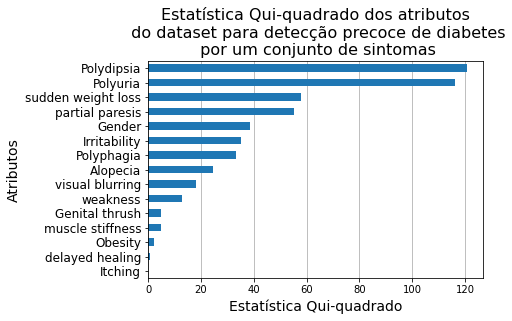

In [7]:
from sklearn.feature_selection import SelectKBest, chi2

x = diabetes.iloc[:,1:-1]
y = diabetes.iloc[:,-1]

# Ajuste da função
bestfeatures_chi2 = chi2(x,y)

# Criação do Dataframe
dfscores_chi2 = pd.DataFrame(bestfeatures_chi2[0])
dfpvalues_chi2 = pd.DataFrame(bestfeatures_chi2[1])
dfcolumns_chi2 = pd.DataFrame(x.columns)
featureScores_chi2 = pd.concat([dfcolumns_chi2,dfscores_chi2,dfpvalues_chi2],axis=1)
featureScores_chi2.columns = ['Atributo','Score','P-valor']
# Print dos atributos com p-valor menor do que 0.01
print(featureScores_chi2[featureScores_chi2['P-valor']<0.01].sort_values('P-valor',ascending = True))

# Plot dos atributos em um gráfico de barras
featureScores_chi2.sort_values('Score',ascending = True).plot.barh(x = 'Atributo',y = 'Score',rot=0,zorder=2,legend=False)
plt.grid(axis='x')
plt.title("Estatística Qui-quadrado dos atributos\n do dataset para detecção precoce de diabetes\n por um conjunto de sintomas",fontdict={'size':16})
plt.yticks(fontsize=12)
plt.xlabel("Estatística Qui-quadrado",fontsize=14)
plt.ylabel("Atributos",fontsize=14)
plt.show()

## Combinação das variáveis categóricas dos sintomas

Os sintomas foram combinados para identificar quais ocorrências conjuntas poderiam ser mais informativas do que suas formas individuais. Portanto, a variável só retornou 1 quando ambos sintomas eram 1, caso contrário, seriam anotadas como 0

### Montagem do dataset com pares de sintomas

In [8]:
columns = list(diabetes.columns[2:16])
columns2 = []
diabetes2 = diabetes[columns]

for i in range (len(columns)):
    for j in range (i+1, len(columns)):
        columns2.append(columns[i] + '&' + columns[j])

diabetes3 = pd.DataFrame(columns = columns2)

for column in columns2:
    column1, column2 = column.split("&")
    diabetes3[column] = diabetes2[column1] & diabetes2[column2]

diabetes3['class'] = diabetes['class']
diabetes3

,Polyuria&Polydipsia,Polyuria&sudden weight loss,Polyuria&weakness,Polyuria&Polyphagia,Polyuria&Genital thrush,Polyuria&visual blurring,Polyuria&Itching,Polyuria&Irritability,Polyuria&delayed healing,Polyuria&partial paresis,...,delayed healing&muscle stiffness,delayed healing&Alopecia,delayed healing&Obesity,partial paresis&muscle stiffness,partial paresis&Alopecia,partial paresis&Obesity,muscle stiffness&Alopecia,muscle stiffness&Obesity,Alopecia&Obesity,class
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,1,0,0,1,0,1,0,...,1,1,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,1,1,0,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
516,1,1,1,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
517,1,1,1,1,0,1,0,0,0,1,...,0,0,0,1,0,1,0,1,0,1
518,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


### Melhores features combinadas

#### Mutual Information

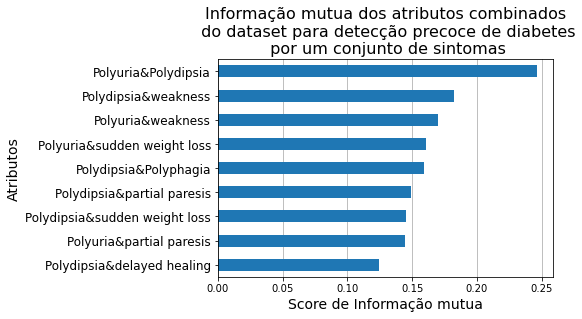

In [9]:
x_pair = diabetes3.iloc[:,:-1]
y_pair = diabetes3.iloc[:,-1]

bestfeatures_mi_pair = mutual_info_classif(x_pair,y_pair,discrete_features=True)

# Criação do Dataframe
dfscores_pair_mi = pd.DataFrame(bestfeatures_mi_pair)
dfcolumns_pair_mi = pd.DataFrame(x_pair.columns)
featureScores_pair_mi = pd.concat([dfcolumns_pair_mi,dfscores_pair_mi],axis=1)
featureScores_pair_mi.columns = ['Atributo','Score']

# Plot dos atributos em um gráfico de barras
featureScores_pair_mi.nlargest(9,'Score').sort_values('Score',ascending = True).plot.barh(x = 'Atributo',rot=0,zorder=2,legend=False)
plt.grid(axis='x')
plt.title("Informação mutua dos atributos combinados\n do dataset para detecção precoce de diabetes\n por um conjunto de sintomas",fontdict={'size':16})
plt.yticks(fontsize=12)
plt.xlabel("Score de Informação mutua",fontsize=14)
plt.ylabel("Atributos",fontsize=14)
plt.show()

#### Qui-quadrado

                       Atributo       Score       P-valor
0           Polyuria&Polydipsia  120.625000  4.616436e-28
14          Polydipsia&weakness   99.252654  2.222586e-23
2             Polyuria&weakness   93.994054  3.164731e-22
1   Polyuria&sudden weight loss   90.534697  1.817614e-21
15        Polydipsia&Polyphagia   88.653741  4.703362e-21
..                          ...         ...           ...
54           Polyphagia&Obesity    8.939535  2.790638e-03
45             weakness&Obesity    8.379018  3.795775e-03
68     visual blurring&Alopecia    8.001220  4.674586e-03
35   sudden weight loss&Obesity    7.020755  8.057026e-03
43    weakness&muscle stiffness    6.939456  8.431476e-03

[70 rows x 3 columns]


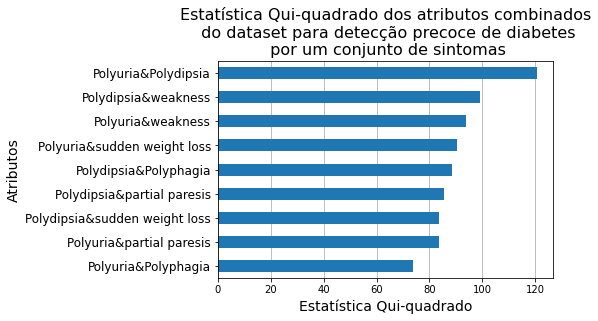

In [10]:
x_pair = diabetes3.iloc[:,:-1]
y_pair = diabetes3.iloc[:,-1]

# Ajuste da função
bestfeatures_pair_chi2 = chi2(x_pair,y_pair)

# Criação do Dataframe
dfscores_pair_chi2 = pd.DataFrame(bestfeatures_pair_chi2[0])
dfpvalues_pair_chi2 = pd.DataFrame(bestfeatures_pair_chi2[1])
dfcolumns_pair_chi2 = pd.DataFrame(x_pair.columns)
featureScores_pair_chi2 = pd.concat([dfcolumns_pair_chi2,dfscores_pair_chi2,dfpvalues_pair_chi2],axis=1)
featureScores_pair_chi2.columns = ['Atributo','Score','P-valor']
# Print dos atributos com p-valor menor do que 0.01
print(featureScores_pair_chi2[featureScores_pair_chi2['P-valor']<0.01].sort_values('P-valor',ascending = True))

# Plot dos atributos em um gráfico de barras
featureScores_pair_chi2.nlargest(9,'Score').sort_values('Score',ascending = True).plot.barh(x = 'Atributo',y='Score',rot=0,zorder=2,legend=False)
plt.grid(axis='x')
plt.title("Estatística Qui-quadrado dos atributos combinados\n do dataset para detecção precoce de diabetes\n por um conjunto de sintomas",fontdict={'size':16})
plt.yticks(fontsize=12)
plt.xlabel("Estatística Qui-quadrado",fontsize=14)
plt.ylabel("Atributos",fontsize=14)
plt.show()

### Quais features combinadas superam a contribuição individual de suas componentes?

#### Mutual Information

In [11]:
better_than_before_features_mi = pd.DataFrame()
for symptoms in featureScores_pair_mi['Atributo']:
    if((float(featureScores_mi[featureScores_mi['Atributo']==symptoms.split('&')[0]]['Score']) < float(featureScores_pair_mi[featureScores_pair_mi['Atributo']==symptoms]['Score'])) and (float(featureScores_mi[featureScores_mi['Atributo']==symptoms.split('&')[1]]['Score'])< float(featureScores_pair_mi[featureScores_pair_mi['Atributo']==symptoms]['Score']))):
        better_than_before_features_mi = better_than_before_features_mi.append(featureScores_pair_mi[featureScores_pair_mi['Atributo']==symptoms])
better_than_before_features_mi.sort_values('Score',ascending = False)

,Atributo,Score
26,sudden weight loss&Polyphagia,0.119012
32,sudden weight loss&partial paresis,0.115112
74,Itching&Alopecia,0.080149
83,delayed healing&Alopecia,0.065510
36,weakness&Polyphagia,0.061842
55,Genital thrush&visual blurring,0.035207
60,Genital thrush&muscle stiffness,0.032144
89,muscle stiffness&Obesity,0.011392
71,Itching&delayed healing,0.005589


#### Qui-quadrado

In [12]:
better_than_before_features = pd.DataFrame()
for symptoms in featureScores_pair_chi2['Atributo']:
    if((float(featureScores_chi2[featureScores_chi2['Atributo']==symptoms.split('&')[0]]['Score']) < float(featureScores_pair_chi2[featureScores_pair_chi2['Atributo']==symptoms]['Score'])) and (float(featureScores_chi2[featureScores_chi2['Atributo']==symptoms.split('&')[1]]['Score'])< float(featureScores_pair_chi2[featureScores_pair_chi2['Atributo']==symptoms]['Score']))):
        better_than_before_features = better_than_before_features.append(featureScores_pair_chi2[featureScores_pair_chi2['Atributo']==symptoms])
better_than_before_features[better_than_before_features['P-valor']<0.01].sort_values('P-valor',ascending = True)

,Atributo,Score,P-valor
26,sudden weight loss&Polyphagia,71.792500,2.390592e-17
32,sudden weight loss&partial paresis,69.924409,6.162117e-17
74,Itching&Alopecia,64.635208,9.013037e-16
25,sudden weight loss&weakness,58.957055,1.611510e-14
83,delayed healing&Alopecia,53.390678,2.733911e-13
36,weakness&Polyphagia,40.296451,2.182050e-10
55,Genital thrush&visual blurring,22.500000,2.101436e-06
60,Genital thrush&muscle stiffness,20.625000,5.586187e-06
38,weakness&visual blurring,19.346286,1.090311e-05
89,muscle stiffness&Obesity,9.633333,1.910775e-03
